# Model Specification

Dirichlet process

$$
\begin{aligned}
y_i|c_i, \{ \mu_k, \Sigma_k\} &\sim N_D(\mu_{c_i}, \Sigma_{c_i}) \\[10pt]
c_i | \pi &\sim Discrete(\pi_i, \dots, \pi_k) \\[10pt]
\{ \mu_k, \Sigma_k \} &\sim \text{Normal Inverse-Wishart} (\beta) \quad, (\beta=\{ \mu_0, \lambda_0, \nu_0, S_0  \}) \\[10pt]
\pi &\sim Dirichlet(\frac{\alpha}{K}, \dots, \frac{\alpha}{K}) 
\end{aligned}
$$

**Normal Inverse Wishart Distribution**

- multivariate distribution with 4 parameters: $(\mu_0, \lambda_0, S_0, \nu_0)$

$$
\begin{aligned}
\mu | \mu_0, \lambda_0, \Sigma &\sim N_D(\mu | \mu_0, \frac{1}{\lambda_0}\Sigma) \\[5pt]
\Sigma | S_0, \mu_0 &\sim \text{Inv-Wishart}(\Sigma | S_0, \nu_0)
\end{aligned}
$$

# Collapsed Gibbs Sampling

$$
\begin{aligned}
p(c_i = k | c_{-i}, y, \alpha, \beta) &\propto p(c_i=k|c_{-i}, \alpha) \; p(y | c_{-i}, c_i = k, \beta) \\[20pt]
p(c_i=k|c_{-i}, \alpha) &=
    \begin{cases}
      \frac{N_{-i,k}}{N + \alpha - 1}, & \text{(assignment at existing table)} \\[5pt]
      \frac{\alpha}{N + \alpha - 1}, & \text{(new table)}
    \end{cases} \\[20pt]
p(y | c_{-i}, c_i = k, \beta) &\propto \frac{ p( \{ y_{i,k} \} | \beta)}{p( \{ y_{-i,k} \} | \beta)} \\[5pt]
&= \int_\mu \int_\Sigma \prod_{i|c_i=k} p(y_i | \mu, \Sigma) p (\mu, \Sigma | \beta) \\[5pt]
&= (\pi \frac{\lambda_N}{\lambda_{N-1}})^{-\frac{D}{2}} \frac{|S_N|^{\frac{-\nu_N}{2}}}{|S_{N-1}|^{\frac{-\nu_{N-1}}{2}}} \frac{\Gamma(\frac{\nu_0+N}{2})}{\Gamma(\frac{\nu_0+N-D}{2})} \\[5pt]
&\equiv t_{\nu_{N-1}-D+1}\Big(y_i | \mu_{N-1}, \frac{S_{N-1}(\lambda_{N-1} + 1)}{\lambda_{N-1} (\nu_{N-1} - D + 1)} \Big)
\end{aligned}
$$

$$
\begin{aligned}
\because &\quad\quad \\
&p(y_i | \mu, \Sigma) = N(y_i, \mu, \Sigma) \\
&p(\mu, \Sigma | \beta) = \text{Normal Inverse-Wishart}(\mu, \Sigma | \beta) \\[10pt]
&\Rightarrow \prod_{i|c_i=k} p(y_i | \mu, \Sigma) p (\mu, \Sigma | \beta) \sim \text{Normal Inverse-Wishart}(\mu_N, \lambda_N, \nu_N, S_N) \\[10pt]
&\quad\quad \mu_N = \frac{\lambda_0\mu_0 + N\bar y}{\lambda_N} \\
&\quad\quad \lambda_N = \lambda_0 + N \\
&\quad\quad \nu_N = \nu_0 + N \\ 
&\quad\quad S_N = S_0 + \sum_{i=1}^{N} (y_i - \bar y) (y_i - \bar y)^T + \frac{\lambda_0 N}{\lambda_N} (\bar y - \mu_0)(\bar y - \mu_0)^T
\end{aligned}
$$

In [ ]:
from dpgmm_gibbs import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1-dimensional

(600,)


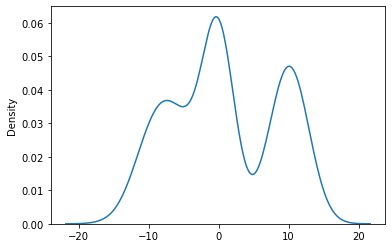

In [ ]:
mixture1 = np.random.normal(loc=0, size=200)
mixture2 = np.random.normal(loc=-8, scale=3, size=200)
mixture3 = np.random.normal(loc=10, scale=2.1, size=200)
data = np.concatenate([mixture1, mixture2, mixture3])
print(data.shape)

# vizualization
sns.kdeplot(data)
plt.show()

########################################################################################
########################################################################################
<0 / 200>
0.00000 sec

0    600
dtype: int64

Number of numerical errors: 0



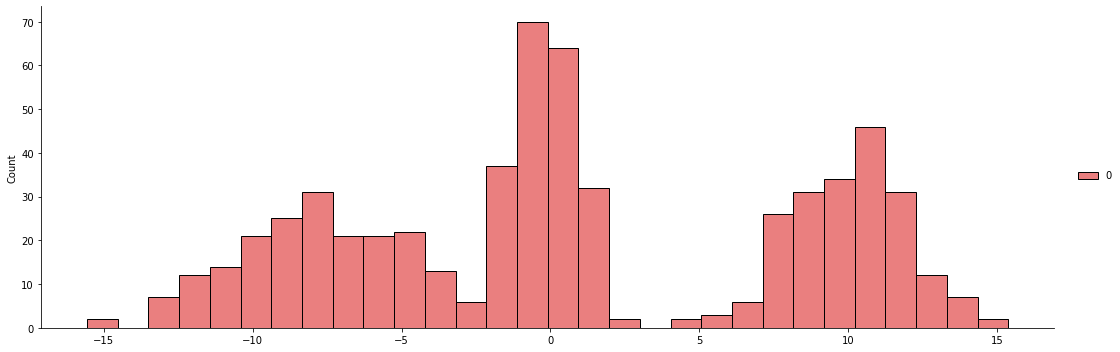


########################################################################################
########################################################################################
<40 / 200>
75.95022 sec

0    573
2     15
1     12
dtype: int64

Number of numerical errors: 0



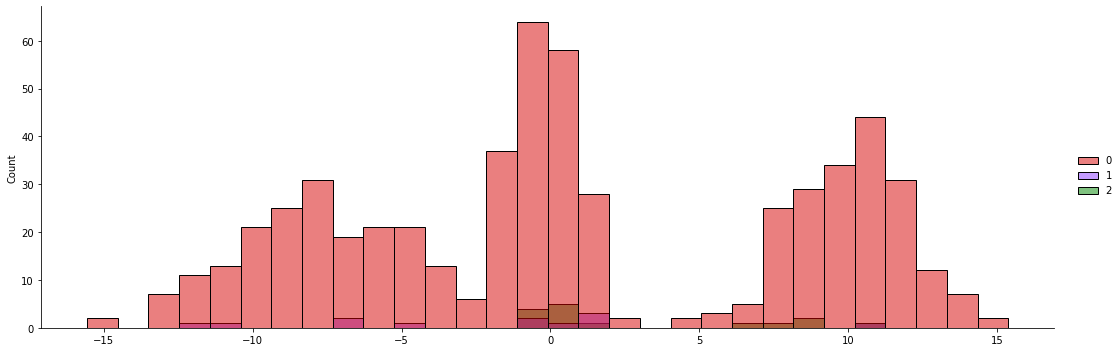


########################################################################################
########################################################################################
<80 / 200>
88.14902 sec

2    199
3    198
0    193
1     10
dtype: int64

Number of numerical errors: 0



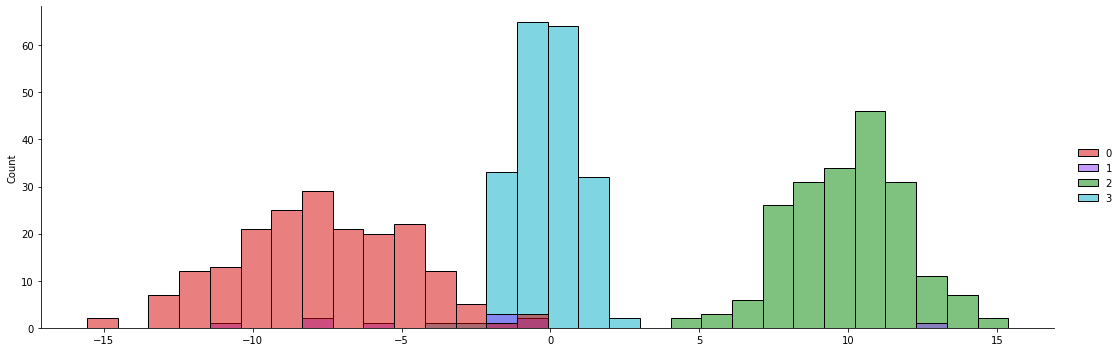


########################################################################################
########################################################################################
<120 / 200>
88.11585 sec

2    199
0    193
3    188
1     20
dtype: int64

Number of numerical errors: 0



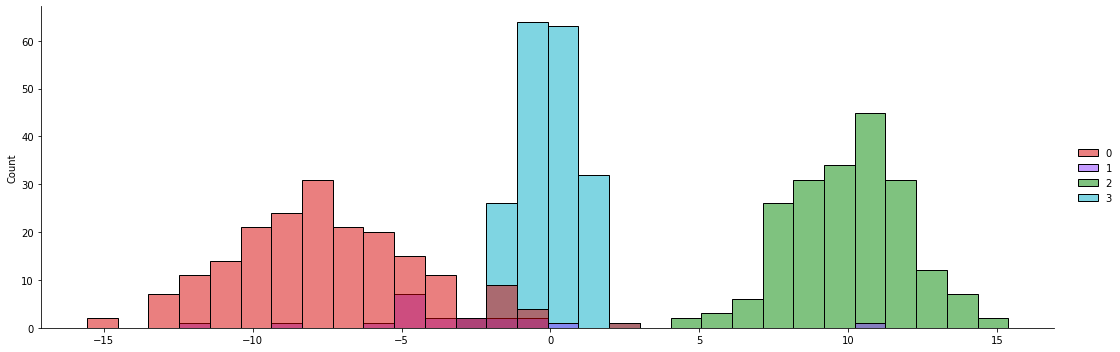


########################################################################################
########################################################################################
<160 / 200>
100.27796 sec

3    201
2    200
0    199
dtype: int64

Number of numerical errors: 0



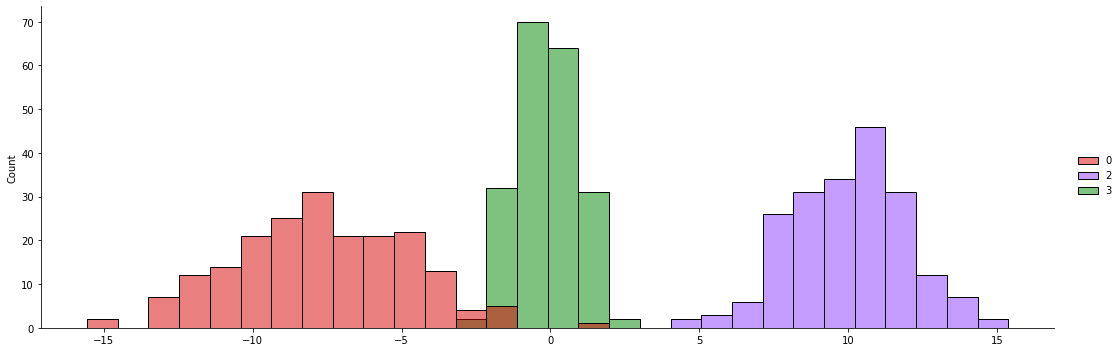


########################################################################################
########################################################################################
<200 / 200>
85.58199 sec

0    204
2    200
3    196
dtype: int64

Number of numerical errors: 0



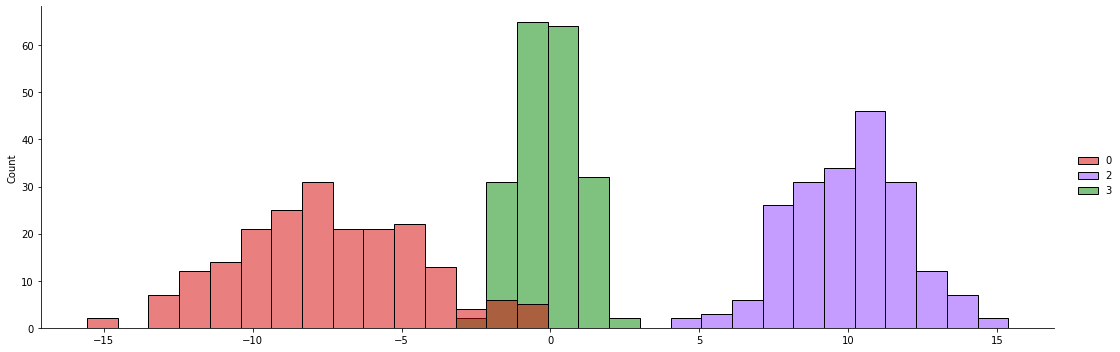


total run time: 438.08193 sec


In [ ]:
dpgmm = DPGMM_gibbs(data=data, alpha=0.01)
result = dpgmm.fit_transform(num_iter=200, verbose=40)

# 2-dimensional

In [ ]:
def random_cov(matrixSize=2):
    A = np.random.rand(matrixSize, matrixSize)
    B = np.dot(A, A.transpose())
    return B

## Case 1

### Data generation

(800, 2)


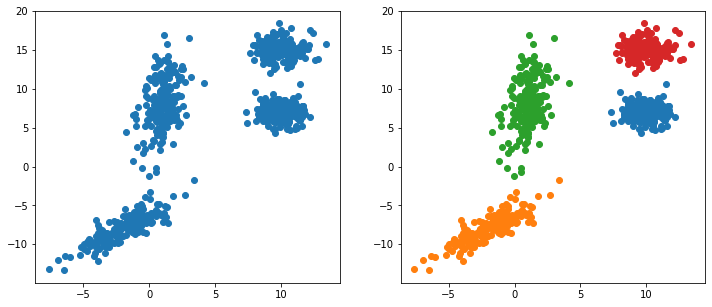

In [ ]:
a = np.array([[3, 2.5],[2.5, 3]])
b = np.array([[0.8, 1],[1, 10]])

# Prepare dataset
g1 = multivariate_normal(mean=[10, 7], cov=1)
g2 = multivariate_normal(mean=[-2, -8], cov=a)
g3 = multivariate_normal(mean=[1, 8], cov=b)
g4 = multivariate_normal(mean=[10, 15], cov=1)

samples = list()
samples.append(g1.rvs(200))
samples.append(g2.rvs(200))
samples.append(g3.rvs(200))
samples.append(g4.rvs(200))

data = np.vstack(samples)
data = data
print(data.shape)

# Viz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].scatter(data[:, 0], data[:, 1])
for sample in samples:
    axes[1].scatter(sample[:, 0], sample[:, 1])

### Fit DPGMM

In [ ]:
dpgmm = DPGMM_gibbs(data=data, alpha=0.01)

########################################################################################
########################################################################################
<0 / 100>
0.00000 sec

0    800
dtype: int64

Number of numerical errors: 0



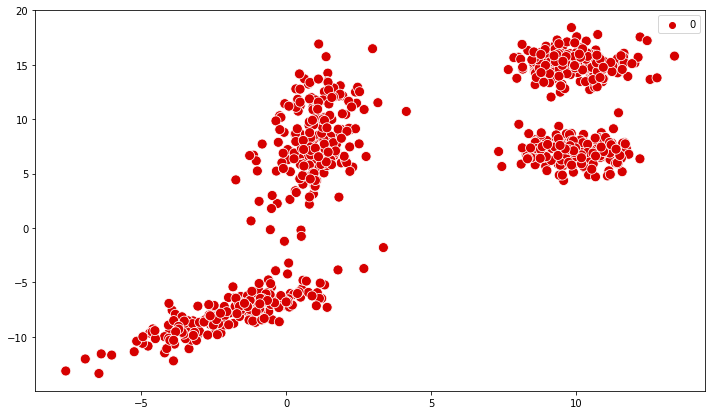


########################################################################################
########################################################################################
<20 / 100>
67.58062 sec

0    200
2    200
3    198
1    198
4      4
dtype: int64

Number of numerical errors: 0



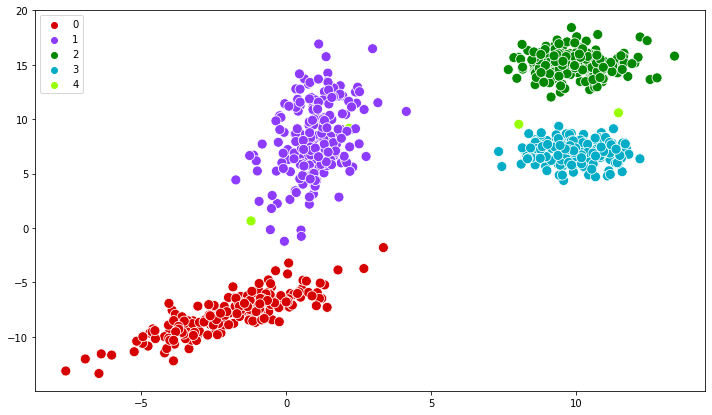


########################################################################################
########################################################################################
<40 / 100>
67.82397 sec

3    200
0    200
1    200
2    200
dtype: int64

Number of numerical errors: 0



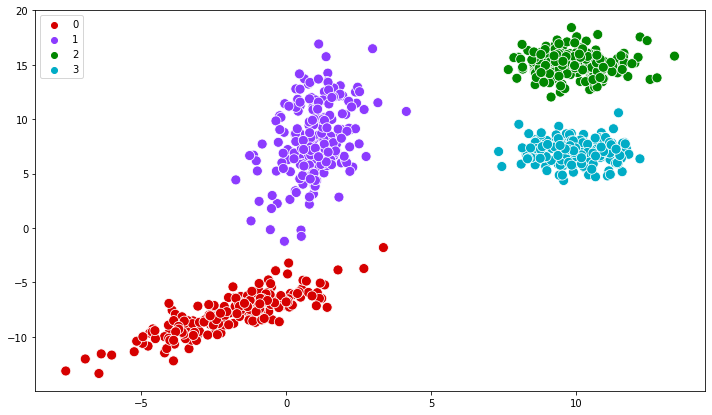


########################################################################################
########################################################################################
<60 / 100>
72.12943 sec

2    201
0    200
1    200
3    199
dtype: int64

Number of numerical errors: 0



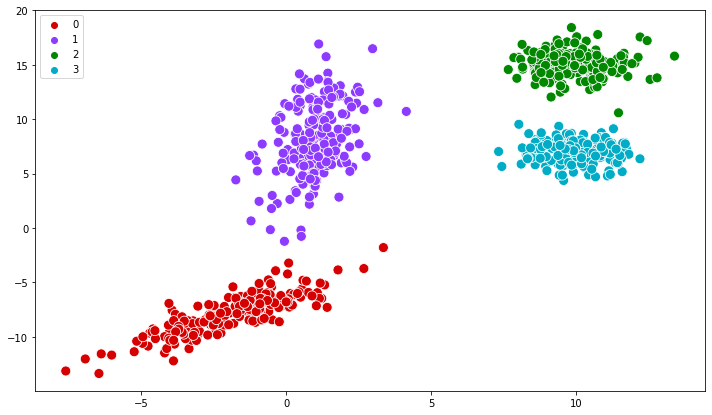


########################################################################################
########################################################################################
<80 / 100>
66.64040 sec

3    200
0    200
1    200
2    200
dtype: int64

Number of numerical errors: 0



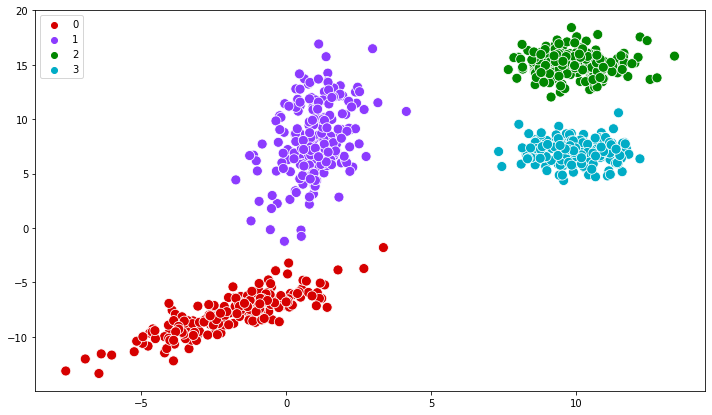


########################################################################################
########################################################################################
<100 / 100>
66.66374 sec

0    200
2    200
1    197
3    196
4      7
dtype: int64

Number of numerical errors: 0



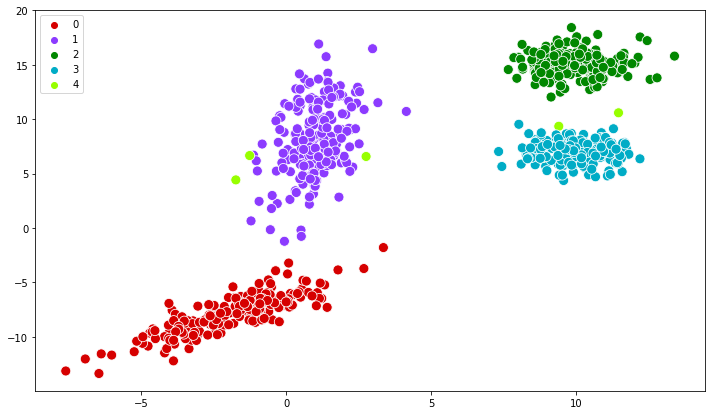


total run time: 340.84393 sec


In [ ]:
result = dpgmm.fit_transform(num_iter=100, verbose=20)

## Case 2

### Data generation

(800, 2)


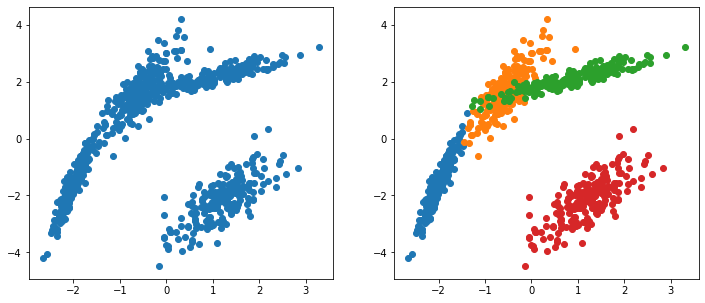

In [ ]:
from scipy.stats import multivariate_normal

np.random.seed(20220122)

a = np.array([[3, 2.5],[2.5, 3]])
b = np.array([[0.8, 1],[1, 10]])

# Prepare dataset
g1 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g2 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g3 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g4 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))

samples = list()
samples.append(g1.rvs(200))
samples.append(g2.rvs(200))
samples.append(g3.rvs(200))
samples.append(g4.rvs(200))

data = np.vstack(samples)
data = data
print(data.shape)

# Viz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].scatter(data[:, 0], data[:, 1])
for sample in samples:
    axes[1].scatter(sample[:, 0], sample[:, 1])

### Fit DPGMM

########################################################################################
########################################################################################
<0 / 200>
0.00000 sec

0    800
dtype: int64

Number of numerical errors: 0



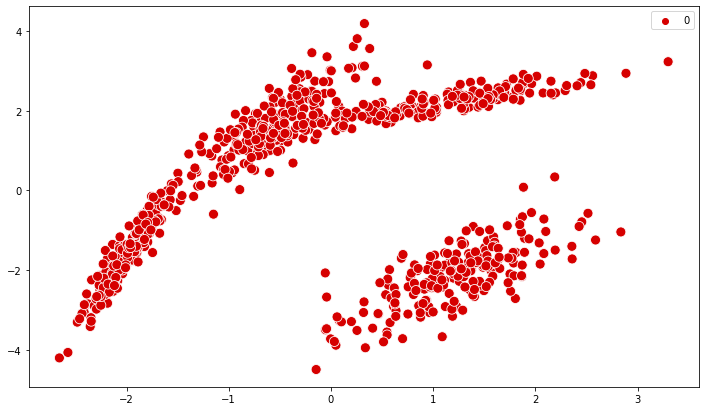


########################################################################################
########################################################################################
<40 / 200>
110.42234 sec

0    800
dtype: int64

Number of numerical errors: 0



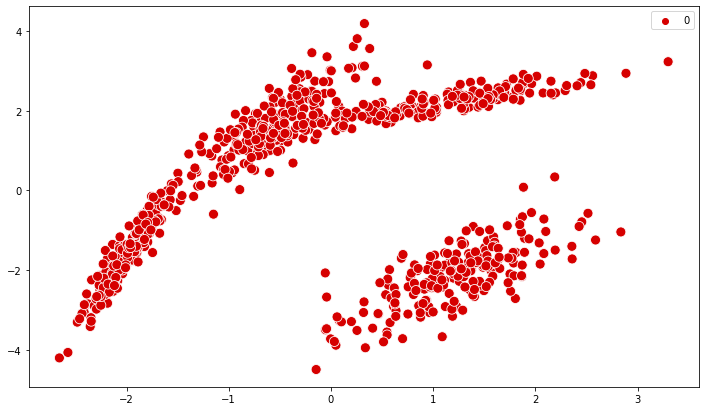


########################################################################################
########################################################################################
<80 / 200>
127.84920 sec

2    384
1    215
0    200
3      1
dtype: int64

Number of numerical errors: 0



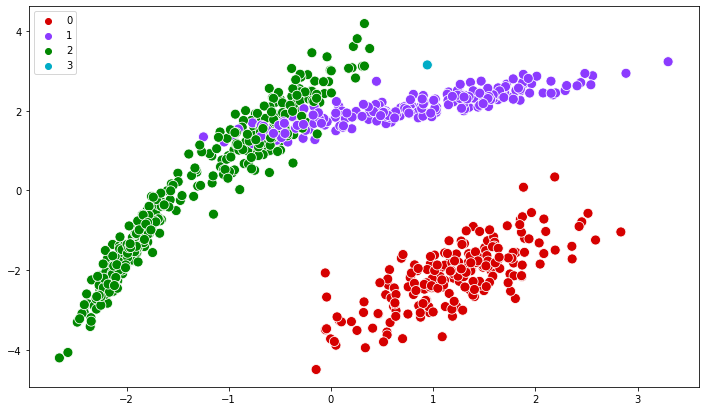


########################################################################################
########################################################################################
<120 / 200>
113.87623 sec

2    374
1    226
0    199
3      1
dtype: int64

Number of numerical errors: 0



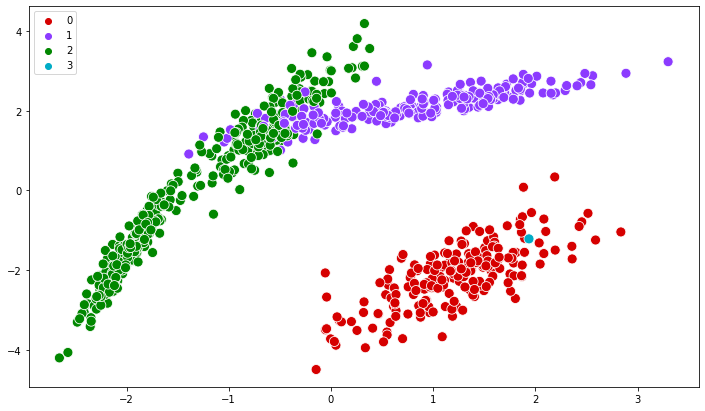


########################################################################################
########################################################################################
<160 / 200>
119.43846 sec

3    208
0    200
2    196
1    196
dtype: int64

Number of numerical errors: 0



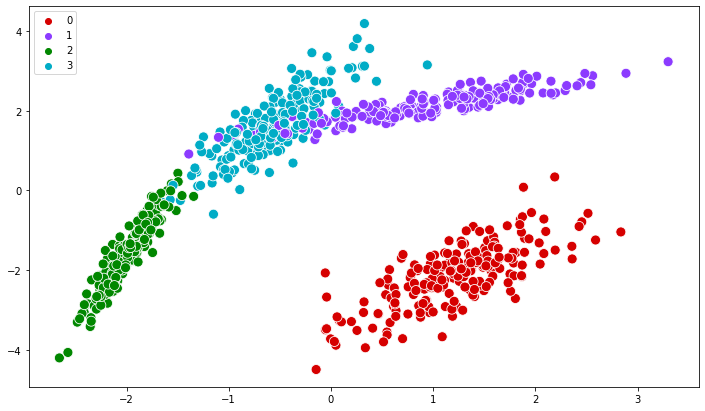


########################################################################################
########################################################################################
<200 / 200>
117.22650 sec

3    218
2    201
0    200
1    181
dtype: int64

Number of numerical errors: 0



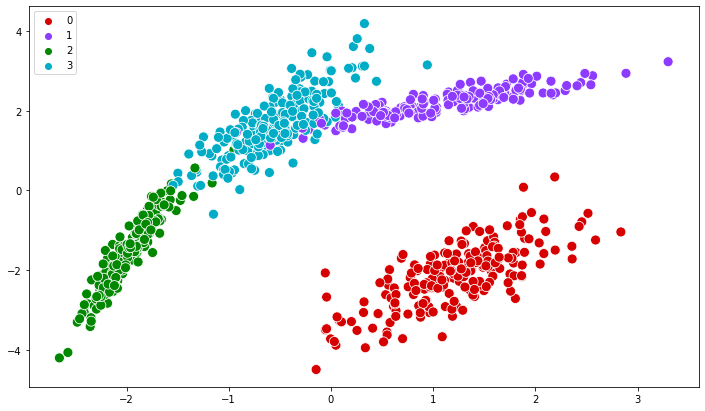


total run time: 588.81866 sec


In [ ]:
dpgmm = DPGMM_gibbs(data=data, alpha=0.01)
result = dpgmm.fit_transform(num_iter=200, verbose=40)

## Case 3

- outlier detection


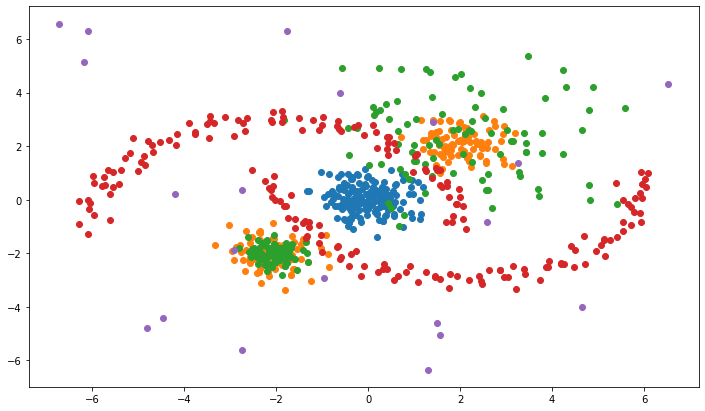

In [ ]:
from sklearn.datasets import make_moons, make_blobs

# Example settings
n_samples = 200
noise = 20
outliers_fraction = 0.1
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
data = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(noise, 2) - 0.5),
]


# viz
plt.figure(figsize=(12,7))
for i in range(len(data)):
    X = data[i][:, 0]
    y = data[i][:, 1]
    plt.scatter(X, y)
plt.show()

########################################################################################
########################################################################################
<0 / 1000>
0.00000 sec

0    760
dtype: int64

Number of numerical errors: 0



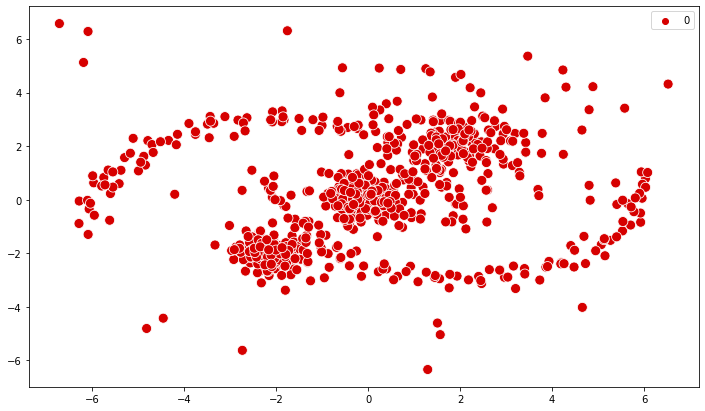


########################################################################################
########################################################################################
<100 / 1000>
249.29159 sec

0    430
1    330
dtype: int64

Number of numerical errors: 0



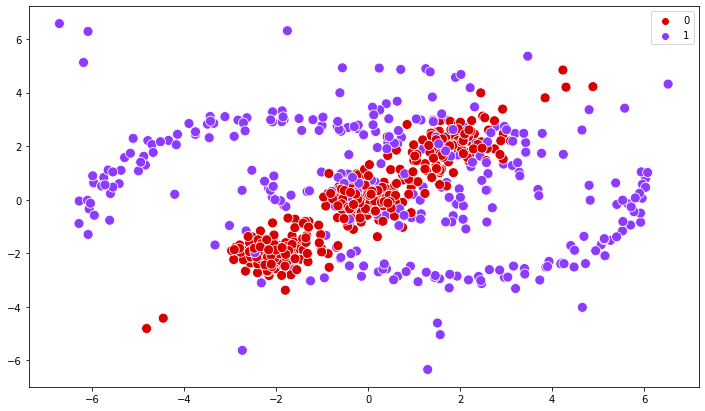


########################################################################################
########################################################################################
<200 / 1000>
239.49941 sec

0    407
1    353
dtype: int64

Number of numerical errors: 0



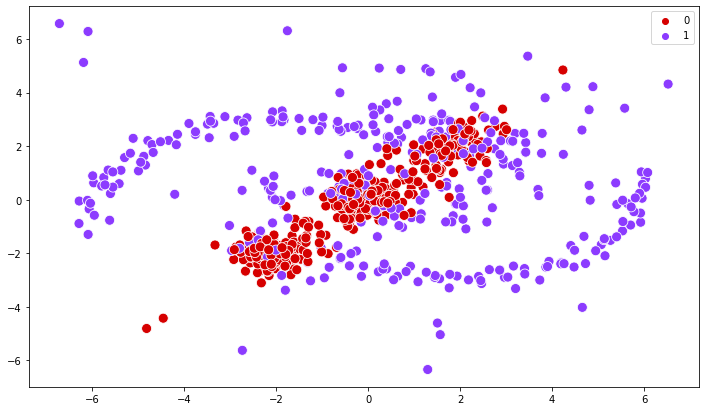


########################################################################################
########################################################################################
<300 / 1000>
257.67857 sec

0    462
1    109
2     92
3     67
4     30
dtype: int64

Number of numerical errors: 0



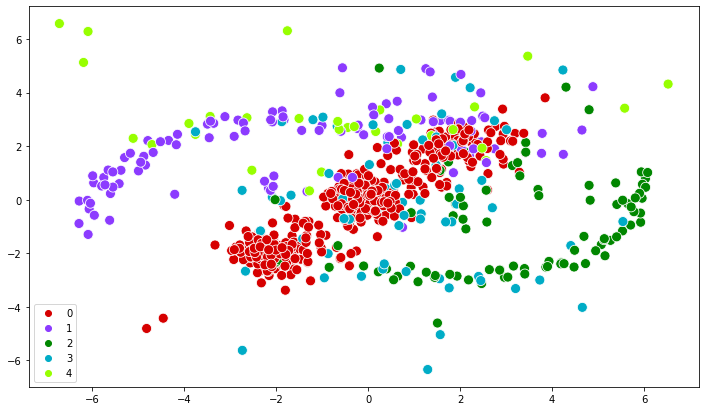


########################################################################################
########################################################################################
<400 / 1000>
290.55964 sec

0    353
2    138
1     81
6     76
4     40
7     30
3     27
5     15
dtype: int64

Number of numerical errors: 0



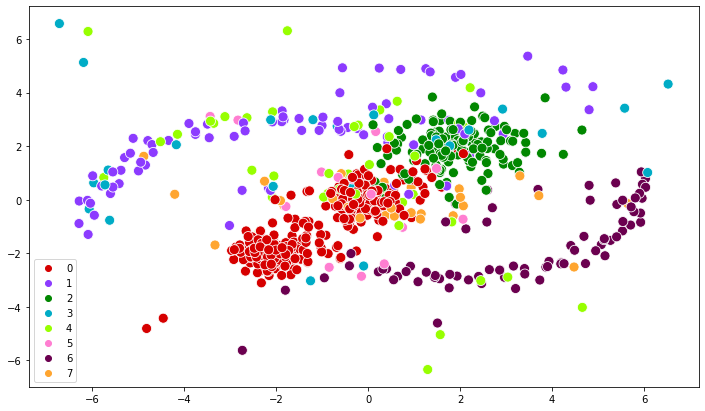


########################################################################################
########################################################################################
<500 / 1000>
330.95432 sec

0    176
2    175
7    141
1     83
3     67
6     67
5     39
4     12
dtype: int64

Number of numerical errors: 0



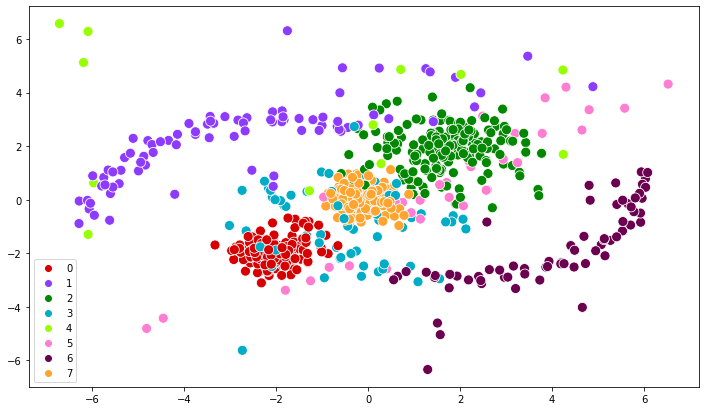


########################################################################################
########################################################################################
<600 / 1000>
338.49287 sec

0    177
7    171
2    145
6     73
1     61
8     59
5     45
4     17
3     12
dtype: int64

Number of numerical errors: 0



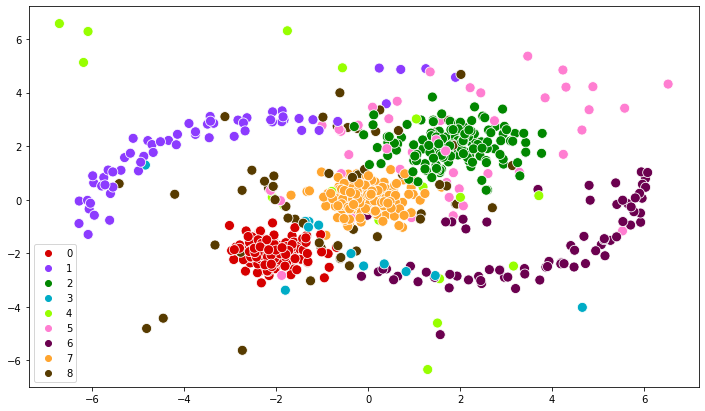


########################################################################################
########################################################################################
<700 / 1000>
347.62449 sec

0    189
7    153
2    136
1     86
6     64
8     53
4     34
5     29
3     16
dtype: int64

Number of numerical errors: 0



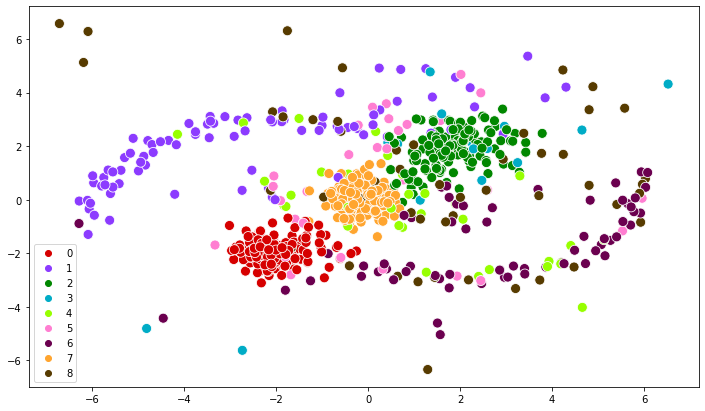


########################################################################################
########################################################################################
<800 / 1000>
353.43011 sec

0    184
7    140
2    139
5     87
1     85
6     62
3     26
4     16
8     14
9      7
dtype: int64

Number of numerical errors: 0



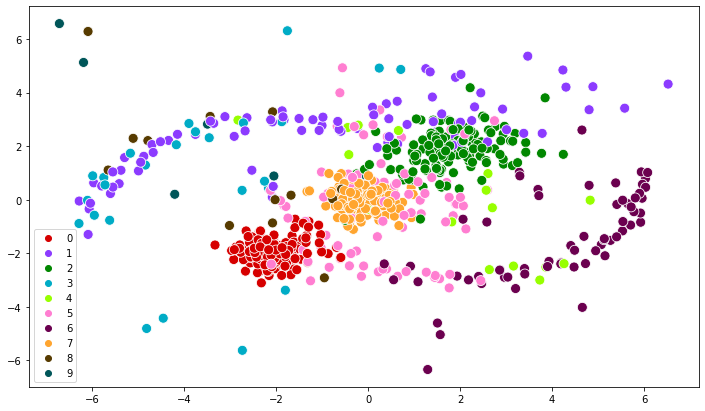


########################################################################################
########################################################################################
<900 / 1000>
375.77580 sec

0     176
7     140
2     129
3      86
10     63
1      53
9      41
4      37
8      15
5      15
6       5
dtype: int64

Number of numerical errors: 0



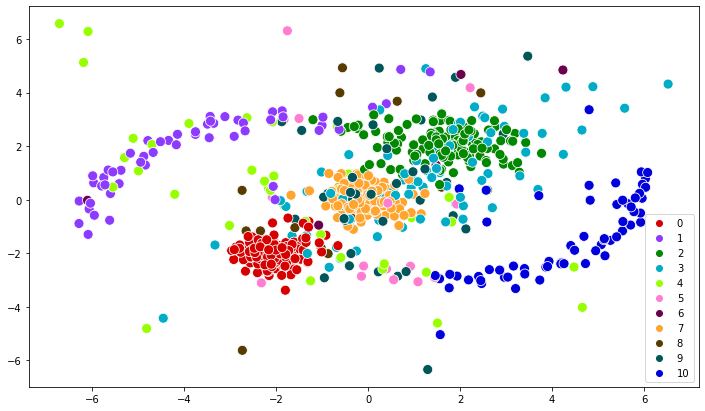


########################################################################################
########################################################################################
<1000 / 1000>
388.97747 sec

0     178
2     130
7     127
6      63
1      58
10     45
8      40
3      40
4      37
12     23
5      14
11      5
dtype: int64

Number of numerical errors: 0



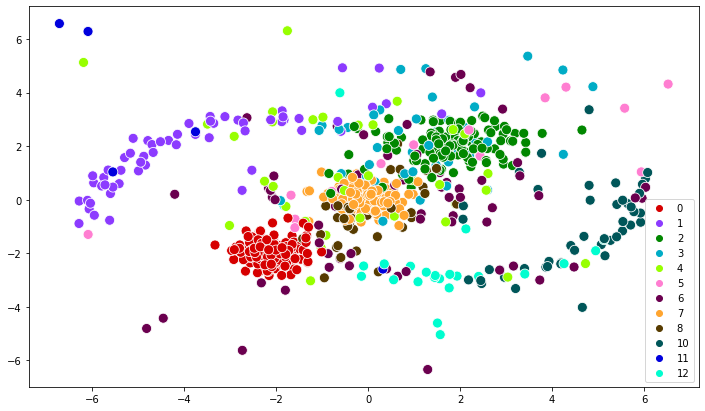


total run time: 3172.29691 sec


In [ ]:
data = np.concatenate([data[i] for i in range(len(data))]) # reshape data into 2-d array

dpgmm = DPGMM_gibbs(data=data, alpha=0.001)
result = dpgmm.fit_transform(num_iter=1000, verbose=100)

# Multi-dimensional

- reduce to 2-d w/ PCA for visualization

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()["data"]

########################################################################################
########################################################################################
<0 / 500>
0.00000 sec

0    150
dtype: int64

Number of numerical errors: 0



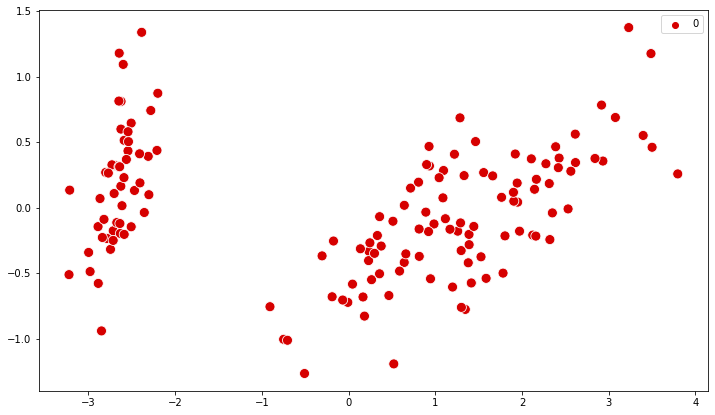


########################################################################################
########################################################################################
<50 / 500>
7.67427 sec

0    150
dtype: int64

Number of numerical errors: 0



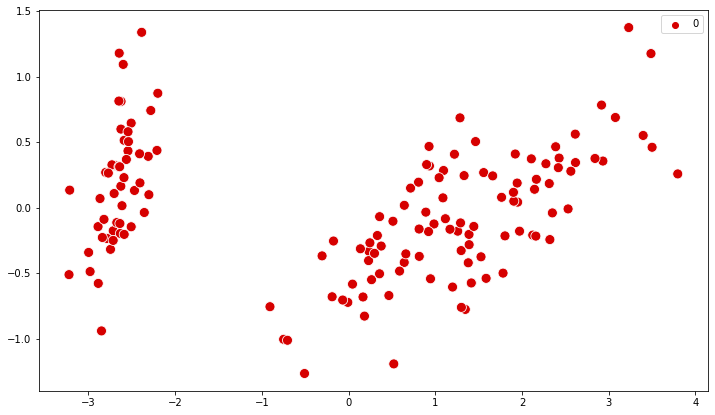


########################################################################################
########################################################################################
<100 / 500>
9.18135 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



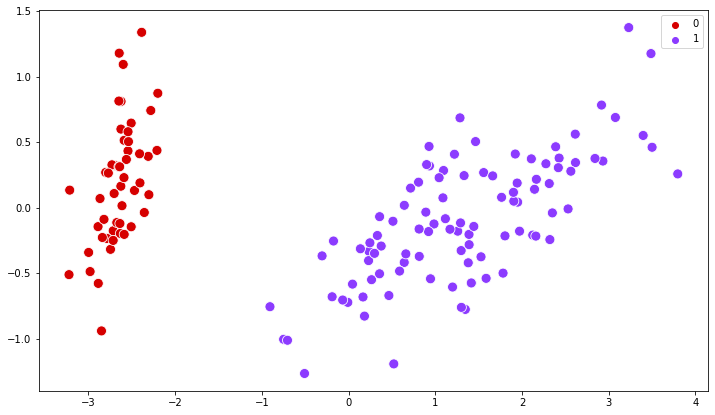


########################################################################################
########################################################################################
<150 / 500>
9.17667 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



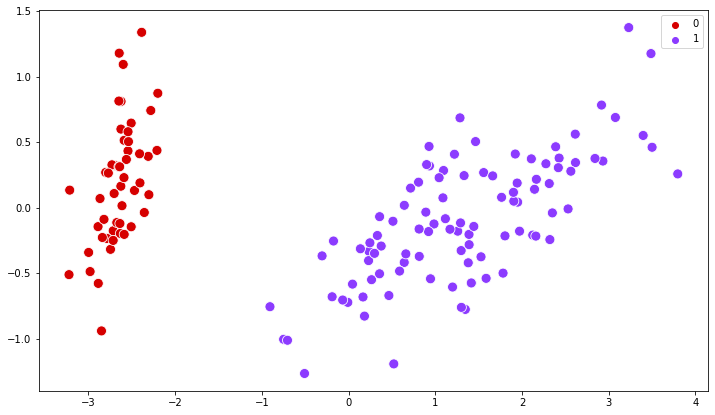


########################################################################################
########################################################################################
<200 / 500>
9.17875 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



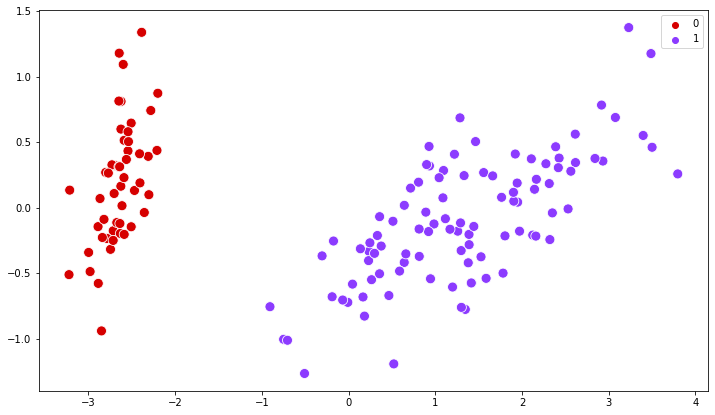


########################################################################################
########################################################################################
<250 / 500>
9.28042 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



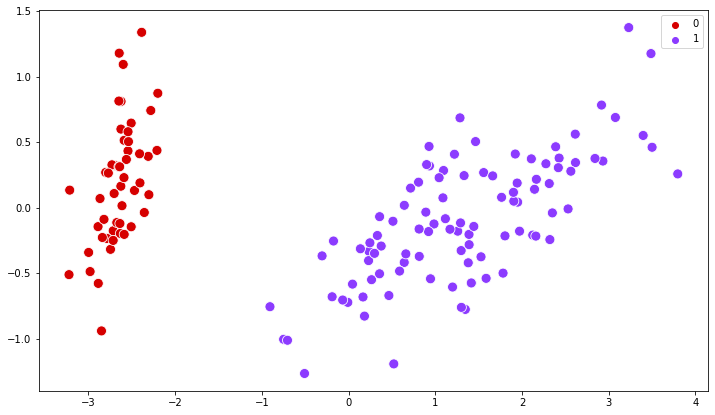


########################################################################################
########################################################################################
<300 / 500>
9.13105 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



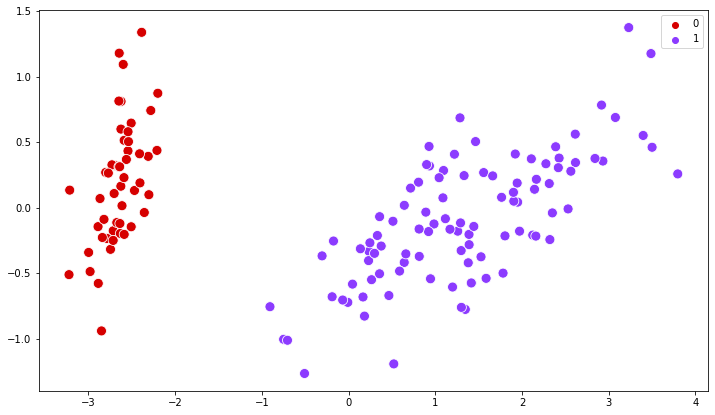


########################################################################################
########################################################################################
<350 / 500>
9.15357 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



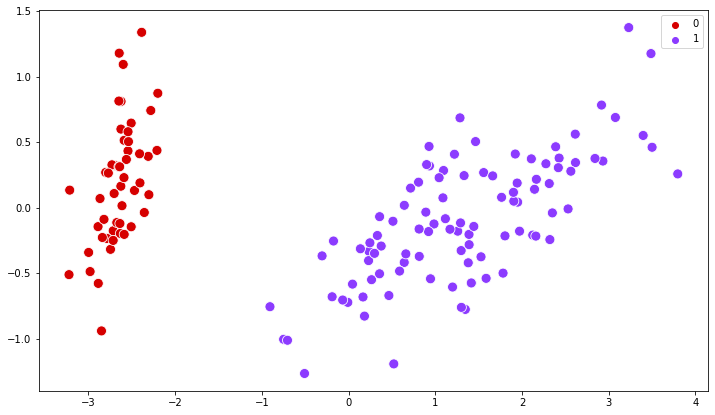


########################################################################################
########################################################################################
<400 / 500>
10.36223 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



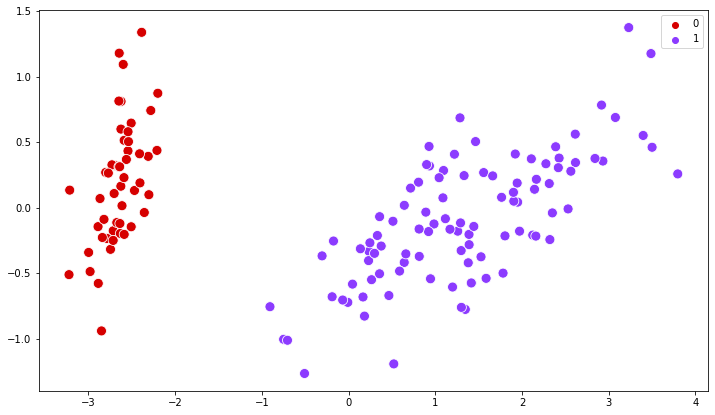


########################################################################################
########################################################################################
<450 / 500>
9.87618 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



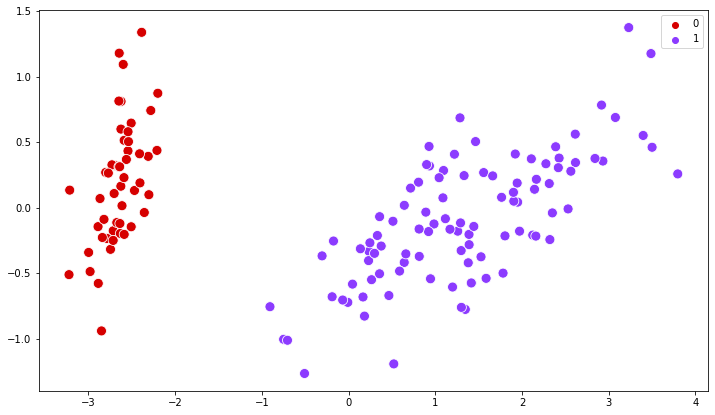


########################################################################################
########################################################################################
<500 / 500>
9.32488 sec

1    100
0     50
dtype: int64

Number of numerical errors: 0



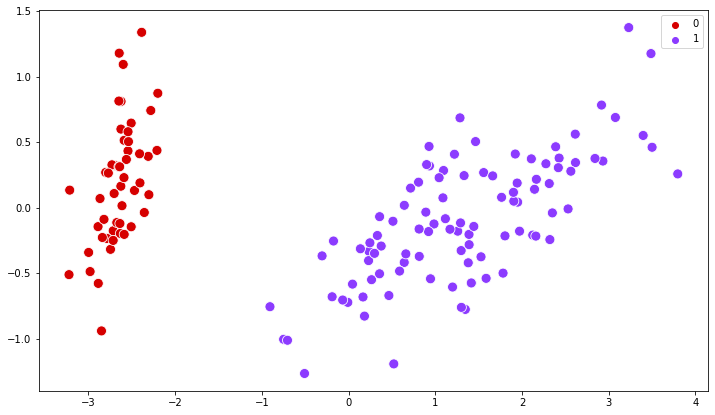


total run time: 92.35239 sec


In [ ]:
dpgmm = DPGMM_gibbs(data=data, alpha=0.01)
result = dpgmm.fit_transform(num_iter=500, verbose=50)